<img src="https://raw.githubusercontent.com/UCLAMAEThreads/MAE150A/master/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**
<hr />

# Basic notes on complex variables
This notebook reviews some aspects of complex variables and demonstrates how to use
them in Julia.

### Set up the module

In [1]:
using MAE150A

In [2]:
using Plots

Potential flows make common use of **complex variables**. For example, rather than
write the position of a point in Cartesian coordinates as $(x,y)$, it is typical
to write it instead as

$$ z = x + \mathrm{i} y $$

where $\mathrm{i} = \sqrt{-1}$ is the imaginary unit. It is also common for us to use
cylindrical (or polar) coordinates. These also have a complex form. If a point is at
$(r,\theta)$, then we write this as

$$ z = r \mathrm{e}^{\mathrm{i}\theta} $$

Remember Euler's formula, $\mathrm{e}^{\mathrm{i}\theta} = \cos\theta + \mathrm{i}\sin\theta$.
This ensures that $x = r \cos\theta$ and $y = r \sin\theta$, as we should expect.

#### Complex variables in Julia
Julia allows us to write complex variables very easily. The imaginary unit is `im`.
So, for example, the point $(1.0,2.0)$ can be written in complex form as

In [3]:
z = 1.0+im*2.0

1.0 + 2.0im

(The reason we used 1.0 instead of 1 was to ensure that this is treated as a floating-point
number, rather than an integer.)

We can always recover the real or imaginary part of a variable with `real` and `imag`:

In [4]:
real(z)

1.0

In [5]:
imag(z)

2.0

We can also set up an array of complex numbers. For example, here is a set of points at
$y = 0.1$ and between $x = -1$ and $x = 1$.

In [6]:
z = (-1:0.1:1) .+ 0.1im;

The `.+` signifies to add `0.1im` (i.e., $0.1\mathrm{i}$) to every element in the list
`-1:0.1:1`.

If we want just the $x$ components of this array of points, then use `real`, but you will
need to use a `.` to apply it to every element of the array:

In [7]:
real.(z)

21-element Vector{Float64}:
 -1.0
 -0.9
 -0.8
 -0.7
 -0.6
 -0.5
 -0.4
 -0.3
 -0.2
 -0.1
  ⋮
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0

Plot these points just to see what we've created:

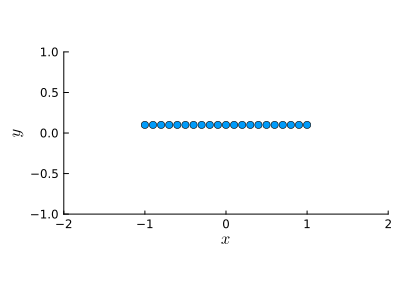

In [8]:
scatter(real.(z),imag.(z),ratio=1,xlim=(-2,2),ylim=(-1,1),legend=false,xlabel=L"x",ylabel=L"y")

Suppose we want points on a circle. That's easy to do in the polar form,
$z = a \mathrm{e}^{\mathrm{i}\theta}$, where $a$ is the radius of the circle, and $\theta$
varies from 0 to $2\pi$.
Set the radius of the circle

In [9]:
a = 0.5

0.5

Set a range of angles between 0 and 2π

In [10]:
θ = range(0,2π,length=50)

0.0:0.1282282715750936:6.283185307179586

And finally, create the coordinates of all of the points on the circle:

In [11]:
z = a*exp.(im*θ)

50-element Vector{ComplexF64}:
                 0.5 + 0.0im
  0.4958950069116231 + 0.063938580842253im
  0.4836474315195147 + 0.12682729195475367im
  0.4634583786730109 + 0.18763350243968704im
  0.4356593520616947 + 0.24535877600196893im
 0.40070681093397836 + 0.29905526524560794im
  0.3591746750488638 + 0.3478412753017432im
  0.3117449009293668 + 0.3909157412340149im
  0.2591962841552626 + 0.42757138150267304im
 0.20239167156119697 + 0.4572063115079062im
                     ⋮
 0.25919628415526225 - 0.4275713815026732im
  0.3117449009293667 - 0.39091574123401496im
  0.3591746750488635 - 0.34784127530174347im
  0.4007068109339782 - 0.2990552652456081im
  0.4356593520616945 - 0.24535877600196931im
  0.4634583786730108 - 0.1876335024396873im
 0.48364743151951456 - 0.12682729195475417im
   0.495895006911623 - 0.06393858084225332im
                 0.5 - 1.2246467991473532e-16im

The last element of z is identical to the first one, so we can get rid of the redundant one
with the following:

In [12]:
pop!(z);

Let us plot these points to check. The `ratio=1` argument makes sure that we get equal
dimensions of the axes. So a circle looks like a circle rather than a squashed circle

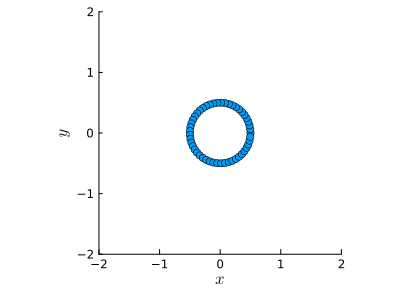

In [13]:
scatter(real.(z),imag.(z),ratio=1,xlim=(-2,2),ylim=(-2,2),legend=false,xlabel=L"x",ylabel=L"y")

### Other operations
The **complex conjugate** is an important operation, denoted by $()^{*}$. For example,
if $z = x + \mathrm{i}y$, then the conjugate simply switches the sign of the imaginary part.

$$ z^{*} = x - \mathrm{i}y $$

It does not look that important, but it is useful for many operations.

For example, the magnitude squared (i.e., the 'length' squared) of a complex variable
can be obtained with the help of the conjugate, $|z|^2 = z z^* = x^2 + y^2$. Check this:

$$ zz^* = (x+\mathrm{i}y)(x-\mathrm{i}y) = x^2 + \mathrm{i}yx - \mathrm{i}xy - \mathrm{i}^2 y^2$$.

But since $\mathrm{i}^2 = -1$, then this is simply $x^2+y^2$.

#### Complex conjugate of the polar form
The complex conjugate of the polar form is also easy:

$$ z^* = r \mathrm{e}^{-\mathrm{i}\theta}$$.

Then, using the polar form, the magnitude squared is

$$ |z|^2 = z z^* = r \mathrm{e}^{\mathrm{i}\theta} r \mathrm{e}^{-\mathrm{i}\theta} = r^2$$

As expected, $r^2 = x^2 + y^2$.

In Julia, we use `conj` to get the complex conjugate and `abs` to get the magnitude

In [14]:
z = 1.0+im*2.0

1.0 + 2.0im

In [15]:
conj(z)

1.0 - 2.0im

In [16]:
abs(z)

2.23606797749979

### The rotation operation
The complex number $\mathrm{e}^{\mathrm{i}\alpha}$ has special importance: By multiplying
it with another complex number, it **rotates** that number by angle $\alpha$ in the
counter-clockwise direction about the origin. That can be particularly useful for moving
points around.

Let's try this:

In [17]:
α = π/2              ## angle of counter-clockwise rotation
z = 1.0+2.0*im       ## original point
zrot = exp(im*α)*z;  ## new point, rotated

Plot these points, using some lines from the origin to show that the rotation
preserves the length.

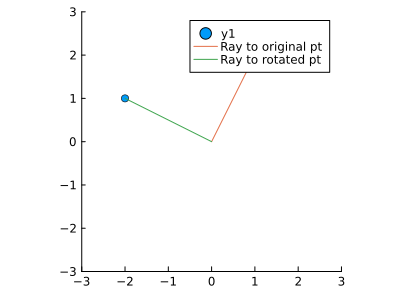

In [18]:
scatter(real.([z,zrot]),imag.([z,zrot]),xlim=(-3,3),ylim=(-3,3),legend=true,ratio=1)
plot!([0,real(z)],[0,imag(z)],label="Ray to original pt")
plot!([0,real(zrot)],[0,imag(zrot)],label="Ray to rotated pt")

### Other uses of complex variables in potential flow
There are many other uses of complex variables in potential flow. We don't need to
cover them all here. However, it is helpful to know that we can write a **velocity vector**
in complex form in terms of its Cartesian components:

$$ u + \mathrm{i} v $$

We can also write velocity in its polar components:

$$ u_r + \mathrm{i} u_\theta $$

We can go from one form to the other by using the **local** rotation operator,
$\mathrm{e}^{-\mathrm{i}\theta}$.

$$ u_r + \mathrm{i} u_\theta = (u + \mathrm{i} v) \mathrm{e}^{-\mathrm{i}\theta}$$"

Try this rotation:

In [19]:
u = 0.0
v = 1.0
θ = π/2
(u+im*v)*exp(-im*θ) # ur + i*uθ

1.0 + 6.123233995736766e-17im

The real and imaginary parts of this are $u_r$ and $u_\theta$

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*